# Code Written and Trained on Kaggle.com using Kaggle Kernels

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/creditcard.csv


In [2]:
data = pd.read_csv("../input/creditcard.csv")
print(data.head())
print(data.shape)
print(data.isna().sum())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115

In [3]:
x_da = data.drop('Class', axis=1).values
y_da = (data['Class'].values).reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(x_da, y_da, test_size=0.3)

In [11]:
X = tf.placeholder(dtype=tf.float32, shape=[None, 30])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])
f_d = {X: X_train, Y:Y_train}

# Hidden Layer Weights and Bias dict
params = {
    'w1': tf.Variable(tf.random_normal([30, 10]) * tf.sqrt(1./10)),
    'w2': tf.Variable(tf.random.normal([35, 40]) * tf.sqrt(1./40)),
    'w3': tf.Variable(tf.random.normal([10, 1]) * tf.sqrt(1./1)),

    'b1': tf.Variable(tf.random.normal([10])),
    'b2': tf.Variable(tf.random.normal([40])),
    'b3': tf.Variable(tf.random.normal([1]))
}

# Computation Graph
hidden_1 = tf.nn.tanh(tf.add(tf.matmul(X, params['w1']), params['b1']))
# hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, params['w2']), params['b2']))
out = tf.sigmoid(tf.add(tf.matmul(hidden_1, params['w3']), params['b3']))

cost = tf.reduce_mean(tf.losses.huber_loss(labels=Y, predictions=out))
optimizer = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cost)
init = tf.global_variables_initializer()

costs = list()
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(1000):
        _, current_cost = sess.run([optimizer, cost], feed_dict=f_d)
        print("Cost: ",current_cost)
        costs.append(current_cost)

Cost:  0.20543367
Cost:  0.20052877
Cost:  0.19565324
Cost:  0.19079258
Cost:  0.18596588
Cost:  0.18118148
Cost:  0.1764289
Cost:  0.17171691
Cost:  0.16703954
Cost:  0.16241509
Cost:  0.1578268
Cost:  0.15330328
Cost:  0.14884737
Cost:  0.14442743
Cost:  0.14006226
Cost:  0.1357472
Cost:  0.1314921
Cost:  0.12724729
Cost:  0.12287984
Cost:  0.11737484
Cost:  0.029580206
Cost:  0.0283886
Cost:  0.027377116
Cost:  0.026454188
Cost:  0.025595633
Cost:  0.024797073
Cost:  0.02405045
Cost:  0.023352582
Cost:  0.022696305
Cost:  0.022079723
Cost:  0.021498872
Cost:  0.020948395
Cost:  0.02042831
Cost:  0.01993533
Cost:  0.019468673
Cost:  0.019025102
Cost:  0.01860087
Cost:  0.018195996
Cost:  0.017807228
Cost:  0.017433746
Cost:  0.017076043
Cost:  0.016735416
Cost:  0.016405454
Cost:  0.016087774
Cost:  0.015781285
Cost:  0.015484414
Cost:  0.015199898
Cost:  0.0149256475
Cost:  0.014658793
Cost:  0.01439909
Cost:  0.0141470935
Cost:  0.013901654
Cost:  0.013660785
Cost:  0.013429968
Cos

Cost:  0.0008367655
Cost:  0.0008367655
Cost:  0.0008367655
Cost:  0.0008367655
Cost:  0.0008367655
Cost:  0.0008367654
Cost:  0.00083676545
Cost:  0.0008367654
Cost:  0.0008367653
Cost:  0.0008367652
Cost:  0.0008367654
Cost:  0.0008367654
Cost:  0.0008367652
Cost:  0.0008367652
Cost:  0.0008367652
Cost:  0.0008367652
Cost:  0.0008367652
Cost:  0.00083676504
Cost:  0.00083676504
Cost:  0.0008367652
Cost:  0.00083676516
Cost:  0.00083676504
Cost:  0.00083676504
Cost:  0.00083676504
Cost:  0.00083676504
Cost:  0.00083676504
Cost:  0.000836765
Cost:  0.0008367649
Cost:  0.0008367649
Cost:  0.0008367649
Cost:  0.0008367649
Cost:  0.0008367649
Cost:  0.0008367648
Cost:  0.0008367648
Cost:  0.0008367648
Cost:  0.0008367648
Cost:  0.00083676475
Cost:  0.0008367648
Cost:  0.00083676475
Cost:  0.00083676475
Cost:  0.00083676475
Cost:  0.00083676464
Cost:  0.00083676464
Cost:  0.00083676464
Cost:  0.00083676464
Cost:  0.00083676464
Cost:  0.00083676464
Cost:  0.0008367645
Cost:  0.0008367645
Co

Cost:  0.00083675655
Cost:  0.00083675655
Cost:  0.00083675666
Cost:  0.00083675655
Cost:  0.0008367565
Cost:  0.00083675655
Cost:  0.0008367565
Cost:  0.0008367565
Cost:  0.0008367565
Cost:  0.00083675643
Cost:  0.0008367564
Cost:  0.0008367564
Cost:  0.0008367564
Cost:  0.0008367564
Cost:  0.0008367564
Cost:  0.00083675626
Cost:  0.00083675626
Cost:  0.00083675626
Cost:  0.00083675626
Cost:  0.0008367562
Cost:  0.0008367562
Cost:  0.0008367562
Cost:  0.00083675614
Cost:  0.000836756
Cost:  0.0008367562
Cost:  0.000836756
Cost:  0.000836756
Cost:  0.000836756
Cost:  0.000836756
Cost:  0.000836756
Cost:  0.000836756
Cost:  0.00083675596
Cost:  0.00083675596
Cost:  0.0008367559
Cost:  0.0008367559
Cost:  0.0008367559
Cost:  0.0008367559
Cost:  0.0008367559
Cost:  0.0008367559
Cost:  0.0008367558
Cost:  0.0008367558
Cost:  0.0008367559
Cost:  0.00083675573
Cost:  0.00083675573
Cost:  0.00083675573
Cost:  0.0008367557
Cost:  0.0008367557
Cost:  0.0008367557
Cost:  0.0008367557
Cost:  0.00

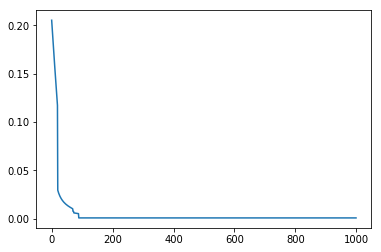

In [12]:
plt.plot(costs)